В этом видео мы потренируемся строить биномиальный критерий для доли. Ранее мы уже научились строить доверительные интервалы для доли с помощью нормального распределения, а также методом Уилсона. В этом видео потренируемся строить критерий.

Давайте рассмотрим следующую задачу. Наверняка многие помнят, что Джеймс Бонд утверждает, что он предпочитает пить мартини взболтанным, но не смешанным. Как бы мы могли проверить это на практике? Можно было бы предложить Джеймсу Бонду пройти так называемый blind test, или слепое тестирование. Можно было бы завязать ему глаза, несколько раз предложить на выбор взболтанный и смешанный мартини, а после этого спросить, какой напиток он предпочитает. В данном случае если бы Джеймс Бонд выбирал взболтанный напиток, мы бы говорили, что это успех, потому что его выбор соответствует его утверждению. В противном случае мы бы говорили, что произошла неудача, так как выбор утверждению не соответствует. Как в данном случае выглядела бы проверка гипотез? Мы бы проверяли нулевую гипотезу о том, что Джеймс Бонд не различает два вида напитков и выбирает наугад, против некоторой альтернативы. Но альтернатива, вообще говоря, могла бы быть разной. С одной стороны, мы могли бы рассматривать двустороннюю альтернативу — Джеймс Бонд отличает два вида напитков, и у него есть некоторые предпочтения, — или одну из односторонних — Джеймс Бонд предпочитает взболтанный мартини, так, как он утверждает, или Джеймс Бонд предпочитает смешанный.

Такой эксперимент мы провели бы n раз и в качестве T-статистики использовали бы количество единиц выборки или сумму элементов выборки.

Если наша нулевая гипотеза справедлива, то есть Джеймс Бонд выбирает напиток наугад, то мы могли бы равновероятно получить любую комбинацию из нулей и единиц. Таких комбинаций ровно 2 в степени n, поэтому для того чтобы получить нулевое распределение, мы могли бы с вами сгенерировать все эти наборы данных, на каждом посчитать значение этой статистики и таким образом получить наше распределение.

На самом деле, в данном случае этот шаг мы можем пропустить. Почему? Потому что мы имеем дело с выборкой, состоящей из нулей и единиц из распределения Бернулли с вероятностью успеха p. В данном случае вероятность успеха p = 0,5, потому что если нулевая гипотеза справедлива, то успех и неудачи просходят равновероятно.

Соответственно, мы с вами работаем с выборкой, которая представляет из себя сумму n независимых одинаково распределенных величин из распределения Бернулли. Соответственно, нулевое распределение статистики — это биномиальное распределение с параметрами n, количество экспериментов, и p, вероятность успеха. Соответственно, давайте возьмем n, равное 16, и вероятность успеха — 0,5.

Вот давайте посмотрим, как распределение нулевой статистики могло бы выглядеть. Давайте для начала его построим, это можно сделать с помощью функции binom, которой мы передаем количество испытаний и вероятность успеха. И дальше давайте просто посмотрим распределение.

# Биномиальный критерий для доли

In [1]:
import numpy as np
from scipy import stats

In [3]:
import scipy
print(np.__version__)
print(scipy.__version__)

1.18.5
1.5.0


In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Shaken, not stirred

In [5]:
2 ** 16

65536

Джеймс Бонд говорит, что предпочитает мартини взболтанным, но не смешанным. Проведём слепой тест (blind test): $n$ раз предложим ему пару напитков и выясним, какой из двух он предпочитает. Получаем: 
* **выборка:** бинарный вектор длины $n$, где 1 — Джеймс Бонд предпочел взболтанный напиток, 0 — смешанный;
* **гипотеза $H_0$:** Джеймс Бонд не различает 2 вида напитков и выбирает наугад;
* **статистика $T$:** количество единиц в выборке.

Если нулевая гипотеза справедлива и Джеймс Бонд действительно выбирает наугад, то мы можем с одинаковой вероятностью получить любой из $2^n$ бинарных векторов длины $n$. 

Мы могли бы перебрать все такие векторы, посчитать на каждом значение статистики $T$ и получить таким образом её нулевое распределение. Но в данном случае этот этап можно пропустить: мы имеем дело с выборкой, состоящей из 0 и 1, то есть, из распределения Бернулли $Ber(p)$. Нулевая гипотеза выбора наугад соответствует значению $p=\frac1{2}$, то есть, в каждом эксперименте вероятность выбора взболтанного мартини равна $\frac1{2}$. Сумма $n$ одинаково распределённых бернуллиевских случайных величин с параметром $p$ имеет биномиальное распределение $Bin(n, p)$. Следовательно, нулевое распределение статистики $T$ — $Bin\left(n, \frac1{2}\right)$.

Пусть $n=16.$

In [7]:
n = 16
F_H0 = stats.binom(n, 0.5)
F_H0

In [9]:
F_H0.pmf(x)

array([1.52587891e-05, 2.44140625e-04, 1.83105469e-03, 8.54492188e-03,
       2.77709961e-02, 6.66503906e-02, 1.22192383e-01, 1.74560547e-01,
       1.96380615e-01, 1.74560547e-01, 1.22192383e-01, 6.66503906e-02,
       2.77709961e-02, 8.54492188e-03, 1.83105469e-03, 2.44140625e-04,
       1.52587891e-05])

In [19]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.])

<BarContainer object of 17 artists>

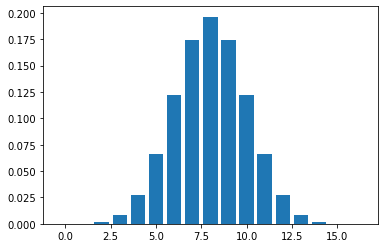

In [14]:
x = np.linspace(0,16,17)

pylab.bar(x,
          F_H0.pmf(x),
          align = 'center')
#xlim(-0.5, 16.5) 
#pylab.show()

Видим, что получили распределение ровно такое, которое мы ожидаем — пик в центре. Так как у нас 16 испытаний, вероятность успеха — 0,5, то пик должен приходиться на 8. Ровно это мы здесь и видим.

Теперь давайте перейдем непосредственно к проверке гипотез. Так как Джеймс Бонд утверждает, что он предпочитает взболтанный мартини, то давайте с этого и начнем и будем тестировать гипотезу H0 против односторонней альтернативы.

## Односторонняя альтернатива

Соответственно, гипотеза H1: Джеймс Бонд предпочитает взболтанный мартини. При такой альтернативе более вероятно попасть в правый конец распределения, то есть более вероятно в нашей выборке получить много единиц. А вот давайте предположим, что мы действительно провели 16 испытаний и при этом в 12 из 16 испытаний Джеймс Бонд выбрал взболтанный мартини, то есть произошел успех.

Давайте построим соответствующее нулевое распределение, и видим, что в данном случае наша T-статистика была бы равна 12 и нас бы интересовал правый «хвост» из нашего распределения. В данном случае нам нужно просуммировать высоту столбцов, начиная со столбца, соответствующего 12, и правее, то есть правый «хвост» нашего распределения, и использовать полученное значение при расчете достигаемого уровня значимости.

Итак, давайте это сделаем. В данном случае передаем в метод binom_test из модуля stats следующие параметры: первый параметр — это 12, количество успехов, соответственно, следующий параметр — 16, количество испытаний, величина 0,5 — это величина p. И соответственно, вид альтернативы, в данном случае односторонняя альтернатива greater.

Итак, давайте посмотрим на значение p-value и увидим, что p-value достаточно маленькое — 0,04. Это говорит о том, что на уровне значимости 0,05 мы можем отвергать нулевую гипотезу. То есть если 12 раз из 16 у нас произойдет успех, то мы с вами можем сделать вывод о том, что Джеймс Бонд предпочитает взболтанный мартини.

**гипотеза $H_1$:** Джеймс Бонд предпочитает взболтанный мартини.

При такой альтернативе более вероятны большие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом хвосте распределения.

<BarContainer object of 5 artists>

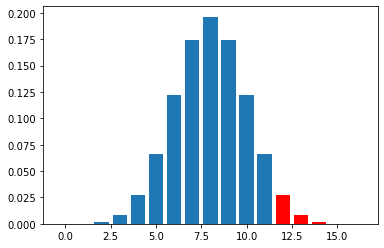

In [26]:
pylab.bar(np.linspace(0,16,17),
          F_H0.pmf(np.linspace(0,16,17)),
          align = 'center')

pylab.bar(np.linspace(12,16,5),
          F_H0.pmf(np.linspace(12,16,5)),
          align = 'center',
          color = 'red')

#xlim(-0.5, 16.5) 
#pylab.show()

In [ ]:
np.linspace(12,16,5)

In [16]:
stats.binom_test(12, 16, 0.5,
                 alternative = 'greater')

0.0384063720703125

Так, давайте посмотрим, что было бы, если бы успехов было немножечко меньше, например, 11. Могли бы мы в этом случае прийти к такому же выводу? Ну давайте построим соответствующую гистограмму и увидим, что добавился еще один столбец по сравнению с предыдущим рисунком. Ну а теперь давайте рассчитаем значение p-value. Как вы думаете, мы получим значение больше или меньше? 

<BarContainer object of 6 artists>

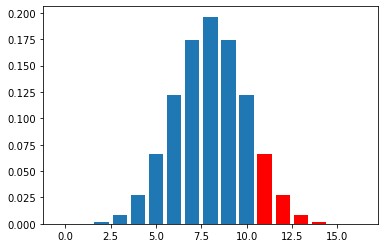

In [17]:
pylab.bar(x,
          F_H0.pmf(x),
          align = 'center')

pylab.bar(np.linspace(11,16,6),
          F_H0.pmf(np.linspace(11,16,6)),
          align = 'center',
          color='red')

#xlim(-0.5, 16.5) 
#pylab.show()

In [18]:
stats.binom_test(11, 16, 0.5, alternative = 'greater')

0.10505676269531246

Давайте посмотрим. Видим, что значение p-value стало больше — теперь это 0,1, то есть на уровне значимости 0,05 мы уже не можем отвергнуть нулевую альтернативу.

## Двусторонняя альтернатива

Теперь давайте перейдем к двусторонней альтернативе. В данном случае гипотеза H1 переформулируется следующим образом: Джеймс Бонд предпочитает какой-то один определенный вид мартини, при этом мы не выбираем, какой именно. При такой альтернативе будут очень вероятны либо большие значения этой статистики, либо очень маленькие. При расчете достигаемого уровня значимости мы с вами будем учитывать как правый, так и левый конец нашего распределения. Соответственно, мы будем суммировать высоту правых и левых столбцов. Вот давайте для начала предположим снова, что у нас произошло 12 успехов, то есть 12 раз Джеймс Бонд выбрал взболтанный мартини, и посмотрим, какие столбцы мы с вами будем суммировать.

**гипотеза $H_1$:** Джеймс Бонд предпочитает какой-то определённый вид мартини.

При такой альтернативе более вероятны очень большие и очень маленькие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом и левом хвостах распределения.

<BarContainer object of 5 artists>

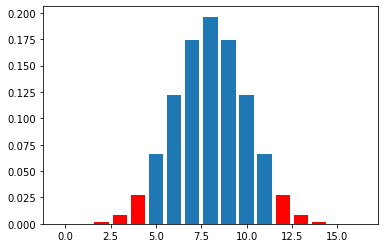

In [27]:
pylab.bar(x,
          F_H0.pmf(x),
          align = 'center')

pylab.bar(np.linspace(12,16,5),
          F_H0.pmf(np.linspace(12,16,5)),
          align = 'center',
          color='red')

pylab.bar(np.linspace(0,4,5),
          F_H0.pmf(np.linspace(0,4,5)),
          align = 'center',
          color='red')

#xlim(-0.5, 16.5) 
#pylab.show()

Видим, что мы снова суммируем тот же самый правый конец, но теперь к нему добавляется и левый конец. Теперь давайте рассчитаем значение p-value. Делаем мы это с помощью той же самой функции, однако теперь меняем вид альтернативы — она двусторонняя. 

In [28]:
stats.binom_test(12, 16, 0.5, alternative = 'two-sided')

0.076812744140625

И смотрим на значение p-value. Видим, что значение p-value — почти 0,08. То есть это больше, чем было в том случае, когда мы проверяли гипотезу H0 против односторонней альтернативы greater. Соответственно, в данном случае мы не можем отвергнуть гипотезу на уровне значимости 0,05, однако мы можем отвергнуть нулевую гипотезу на уровне значимости 0,1.

Итак, давайте посмотрим, что было бы, если бы у нас произошло 13 испытаний — может быть, их достаточно для того, чтобы отвергнуть нулевую гипотезу на уровне 0,05. 

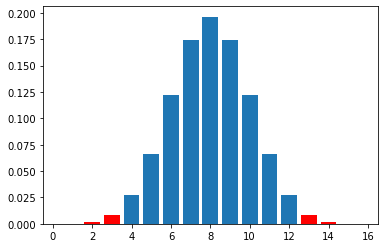

In [29]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(13,16,4), F_H0.pmf(np.linspace(13,16,4)), align = 'center', color='red')
pylab.bar(np.linspace(0,3,4), F_H0.pmf(np.linspace(0,3,4)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [30]:
stats.binom_test(13, 16, 0.5, alternative = 'two-sided')

0.021270751953125

Смотрим и видим, что мы суммируем значения, соответствующие правому левому концу, в данном случае столбцов. Красных столбцов уже меньше, то есть мы видим, что значение статистики более экстремальное. И теперь давайте посмотрим на значение p-value. Видим, что всего лишь 0,02. Соответственно, мы можем отвергнуть нулевую гипотезу на уровне значимости 0,05. 

Итак, мы с вами научились применять **биномиальный критерий для доли**, мы научились тестировать нулевую гипотезу против двусторонних и односторонних альтернатив. А на следующем видео мы поговорим про критерий Хи-квадрат, или критерий согласия Пирсона.